In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import pickle

## Download the dataset

In [3]:
df = pd.read_csv('data/MLS_Features_split_data.csv')
df.head()

,FileName,nobs,mean,skew,kurtosis,median,mode,std,low,peak,q25,q75,iqr,Gender
0,12626_10229_000011.wav_4.wav,15,169.333333,1.401162,0.498132,130.0,130.0,88.371690,95.0,380.0,120.00,187.50,67.5,1
1,7925_6390_000089.wav_4.wav,15,819.666667,2.794093,6.805488,240.0,215.0,1476.551689,165.0,5955.0,200.00,292.50,92.5,0
2,12114_10229_000087.wav_0.wav,15,278.333333,-0.537424,-0.600595,235.0,225.0,143.162689,0.0,440.0,225.00,425.00,200.0,0
3,13063_13511_000043.wav_5.wav,10,666.500000,2.011294,2.801103,457.5,220.0,585.585391,220.0,2275.0,408.75,548.75,140.0,1
4,13063_13511_000032.wav_4.wav,15,727.000000,3.406457,9.772392,455.0,445.0,900.045925,380.0,4075.0,427.50,562.50,135.0,1


## Split the dataset into training and test data
Let's use 20% of the database for testing.

We also need to make sure the classes(Genders) are equally distributed between the classes.

In [4]:
mydata_train, mydata_test = train_test_split(df, random_state=0, test_size=0.2)

print(f'Feminine voices in the training data: {len(mydata_train.Gender)- sum(mydata_train.Gender)}')
print(f'Masculine voices in the training data: {sum(mydata_train.Gender)}')
print(f'Feminine voices in the test data: {len(mydata_test.Gender)- sum(mydata_test.Gender)}')
print(f'Masculine voices in the test data: {sum(mydata_test.Gender)}')


Feminine voices in the training data: 1926
Masculine voices in the training data: 2004
Feminine voices in the test data: 483
Masculine voices in the test data: 500


In [5]:
mydata_train.head()

,FileName,nobs,mean,skew,kurtosis,median,mode,std,low,peak,q25,q75,iqr,Gender
1475,7925_6390_000063.wav_2.wav,20,-22.132288,-3.336945,11.704693,-5.523300,-424.36795,97.518873,-424.36795,119.496100,-20.626551,0.061093,20.687644,0
241,7925_6390_000081.wav_2.wav,20,-23.968729,-3.547423,12.416862,-11.988429,-422.60130,95.306418,-422.60130,85.578820,-16.447547,-3.751930,12.695617,0
2817,11247_10229_000025.wav_0.wav,20,-16.237059,-3.485746,12.266031,-6.167370,-387.30386,89.014702,-387.30386,102.718285,-10.506386,2.841049,13.347435,0
1022,12670_13511_000012.wav_5.wav,20,-16.374593,-3.599595,12.755130,-3.482006,-435.08008,99.595945,-435.08008,110.347770,-6.900924,2.512270,9.413195,0
3474,3050_2941_000026.wav_2.wav,20,-16.693966,-3.251413,11.239869,-3.157269,-366.48532,85.504402,-366.48532,107.322190,-7.683341,5.215944,12.899285,0


In [6]:
data_x_train = mydata_train[['nobs', 'mean', 'skew', 'kurtosis', 'median', 'mode', 'std', 'low', 'peak', 'q25', 'q75', 'iqr']].copy()
y_train = mydata_train[['Gender']].copy().values.ravel()
data_x_test = mydata_test[['nobs', 'mean', 'skew', 'kurtosis', 'median', 'mode', 'std', 'low', 'peak', 'q25', 'q75', 'iqr']].copy()
y_test = mydata_test[['Gender']].copy().values.ravel()

In [7]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(data_x_train), columns=data_x_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(data_x_test), columns=data_x_test.columns)

In [8]:
#Train decision tree model
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
filename = 'models/MLS_DecisionTree.sav'
pickle.dump(tree, open(filename, 'wb'))
print("\nDecision Tree")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

#Train random forest model
forest = RandomForestClassifier(n_estimators=5, random_state=0).fit(X_train, y_train)
filename = 'models/MLS_RandomForest.sav'
pickle.dump(forest, open(filename, 'wb'))
print("\nRandom Forests")
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

#Train gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
filename = 'models/MLS_GradientBoosting.sav'
pickle.dump(gbrt, open(filename, 'wb'))
print("\nGradient Boosting")
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

#Train support vector machine model
svm = SVC().fit(X_train, y_train)
filename = 'models/MLS_SVM.sav'
pickle.dump(svm, open(filename, 'wb'))
print("\nSupport Vector Machine")
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test, y_test)))

#Train neural network model
mlp = MLPClassifier(random_state=0).fit(X_train, y_train)
filename = 'models/MLS_MLP.sav'
pickle.dump(mlp, open(filename, 'wb'))
print("\nMultilayer Perceptron")
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))


Decision Tree
Accuracy on training set: 1.000
Accuracy on test set: 0.892

Random Forests
Accuracy on training set: 0.987
Accuracy on test set: 0.890

Gradient Boosting
Accuracy on training set: 0.928
Accuracy on test set: 0.915

Support Vector Machine
Accuracy on training set: 0.894
Accuracy on test set: 0.900

Multilayer Perceptron
Accuracy on training set: 0.920
Accuracy on test set: 0.917


/home/brunohonorio/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
def plot_feature_importances_mydata(model, c):
    n_features = len(X_train.columns)
    plt.figure(1,figsize=(18,10))
    plt.bar(range(n_features), model.feature_importances_, align='center', color=c)
    plt.xticks(np.arange(n_features), X_train.columns)
    plt.ylabel("Variable importance")
    plt.xlabel("Independent Variable")
    plt.title(model.__class__.__name__)
    plt.show()

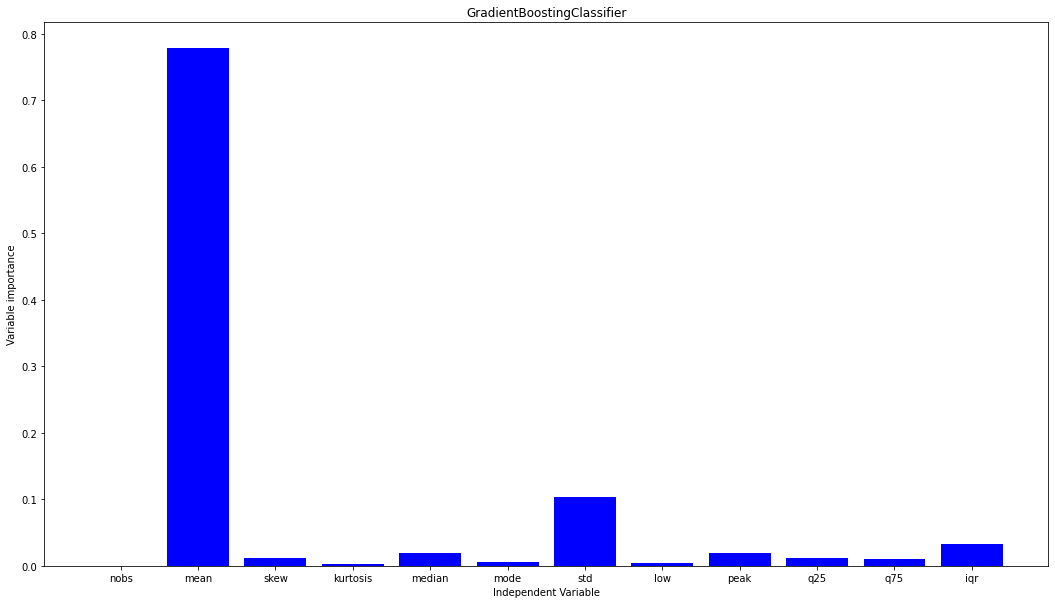

In [11]:
plot_feature_importances_mydata(gbrt,'blue')

In [ ]:
import tensorflow as tf
from tensorflow import keras

NeuralNetwork = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

NeuralNetwork.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = NeuralNetwork.fit(X_train, y_train,validation_split=0.2, epochs=100, verbose=4)

test_loss, test_acc = NeuralNetwork.evaluate(X_test,  y_test, verbose=0)


print('\nTest accuracy:', test_acc)

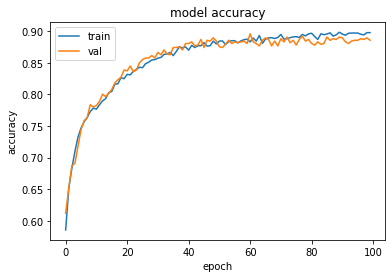

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

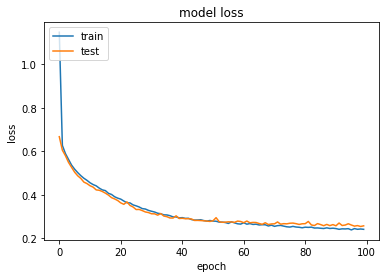

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()